In [75]:
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[autoreload of WindFarmOptimization.windfarm_optimization failed: Traceback (most recent call last):
  File "C:\Users\re08693f\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "C:\Users\re08693f\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 936, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1074, in 

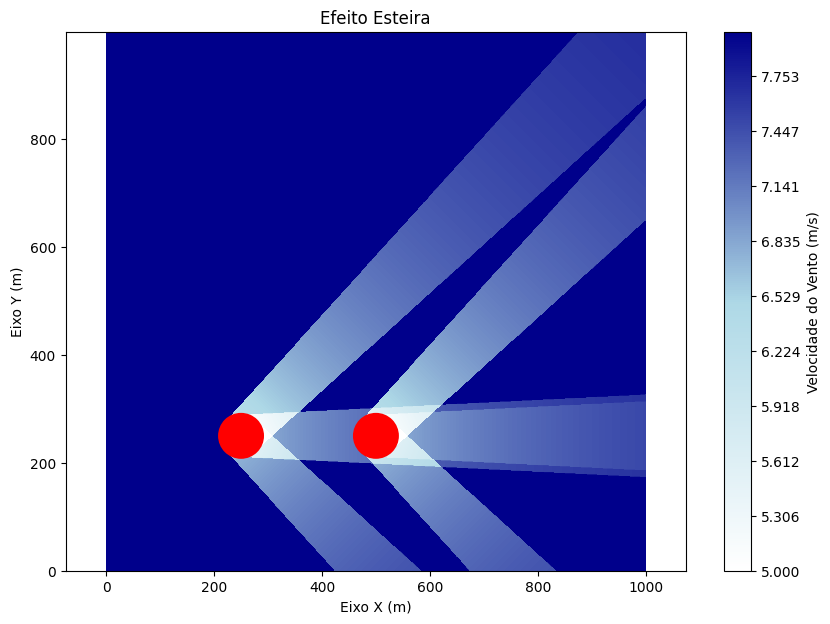

In [72]:
# Importar a biblioteca necessária
from WindFarmOptimization.interferencia_jensen import InterferenciaJensen
import numpy as np
import matplotlib.pyplot as plt
from WindFarmOptimization.windfarm_optimization import WindFarmOptimization

# Definindo a curva de potência (MW) em função da velocidade do vento (m/s)
power_curve = [0.0, 0.065, 0.180, 0.352, 0.590, 0.906, 1.308, 1.767, 2.085, 2.234, 2.283, 2.296, 2.299, 2.300]
wind_speeds = [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0]

# Definição dos cenários de vento
wind_scenarios = [
    {'U': 8, 'wd': 270, 'prob': 0.3},    
    {'U': 8, 'wd': 315, 'prob': 0.3},  
    {'U': 8, 'wd': 225, 'prob': 0.4},  
]

# Inicializa a classe InterferenciaJensen
interferencia_jensen = InterferenciaJensen(
    k=0.05,  # Constante de decaimento (offshore)
    power_curve=power_curve,
    wind_speeds=wind_speeds
)

# Posições das turbinas (em metros)
D = 80  # Diâmetro da turbina (120m)
positions = np.array([
    [250, 250],
    [500, 250],   
])

# Gera uma grade de pontos para o campo de velocidade do vento
x = np.linspace(0, 999, 1000)
y = np.linspace(0, 999, 1000)
X, Y = np.meshgrid(x, y)

# Parâmetros de entrada para o vento
U = 8.0  # Velocidade do vento livre (m/s)
C_t = 0.8  # Coeficiente de impulso (exemplo)

# Calcula o campo de vento com o efeito das esteiras
U_field = interferencia_jensen.aplicar_wake(X, Y, positions, wind_scenarios, C_t, D)

# Plota o campo de vento e as turbinas
interferencia_jensen.plotar_efeito_esteira(X, Y, U_field, positions, D)


In [73]:
# Calcula os valores de w_i para cada turbina
wi = interferencia_jensen.calcular_wi(positions, U_field, X, Y)

# Exibe os valores de w_i
print("Valores de w_i para cada turbina:")
for i, w in wi.items():
    # Certifique-se de que w seja um valor escalar antes de formatar
    if isinstance(w, np.ndarray):
        w = w.item()  # Converte para valor escalar se for array do NumPy
    print(f"Turbina {i}: w_i = {w:.4f} MW")


Valores de w_i para cada turbina:
Turbina 0: w_i = 0.0000 MW
Turbina 1: w_i = 0.2434 MW


In [74]:
# Criar a lista de posições candidatas
positions = [(x, y) for x in range(0, 1000, 250) for y in range(0, 1000, 250)]
positions.append((1000, 1000))  # Adicionar a posição (1000, 1000) como opcional

# Inicializa a classe de otimização com as posições candidatas
otimizador = WindFarmOptimization(
    positions=positions, 
    D_min=250, 
    num_turbinas=6, 
    interferencia_jensen=interferencia_jensen, 
    wind_scenarios=wind_scenarios, 
    C_t=C_t, 
    D=D, 
    power_curve=power_curve, 
    wind_speeds=wind_speeds
)

# Gera uma malha X e Y para calcular o campo de vento
x = np.linspace(0, 1000, 1000)
y = np.linspace(0, 1000, 1000)
X, Y = np.meshgrid(x, y)

# Calcula o campo de vento atual
U_field = interferencia_jensen.aplicar_wake(X, Y, positions, wind_scenarios, C_t, D)

# Resolve o problema de otimização
layout_otimo, energia_total = otimizador.solve(U_field, X, Y)




TypeError: InterferenciaJensen.calcular_wi() missing 2 required positional arguments: 'X' and 'Y'

In [ ]:
# Supondo que você já rodou a otimização e obteve o layout otimizado
layout_otimo, energia_total = otimizador.solve(U_field)

if layout_otimo is not None:
    # Aplicar o efeito de esteira nas posições otimizadas
    U_field_otimizado = interferencia_jensen.aplicar_wake(X, Y, layout_otimo, wind_scenarios, C_t, D)

    # Plota o campo de vento com as turbinas otimizadas
    interferencia_jensen.plotar_efeito_esteira(X, Y, U_field_otimizado, layout_otimo, D)
else:
    print("Otimização não encontrou uma solução válida.")
